# Exploratory Data Analysis (EDA)

This exploratory analysis investigates historical flight delay patterns.  

## Problem Definition

Flight delays cause significant operational and customer satisfaction issues in the aviation industry. This project aims to analyze historical flight data to identify delay patterns and evaluate how well delays can be predicted using contextual and temporal flight information.

The analysis reflects operational behavior and does not account for external factors such as weather, air traffic control decisions, or airport congestion.


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None) # Configures pandas to display all columns when printing DataFrames
sns.set_style("whitegrid") # Sets a clean visual style for plots to improve readability

In [22]:
# Load datasets using a sample for flights due to file size
FLIGHTS_SAMPLE_SIZE = 500_000

flights = pd.read_csv(
    "../data/raw/flights.csv",
    nrows=FLIGHTS_SAMPLE_SIZE
)

airlines = pd.read_csv("../data/raw/airlines.csv")
airports = pd.read_csv("../data/raw/airports.csv")

flights.shape, airlines.shape, airports.shape

((500000, 31), (14, 2), (322, 7))

In [23]:

# Displays the first rows of the dataset to inspect structure and sample values
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Provides dataset metadata: column types, non-null counts, and memory usage
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 500000 non-null  int64  
 1   MONTH                500000 non-null  int64  
 2   DAY                  500000 non-null  int64  
 3   DAY_OF_WEEK          500000 non-null  int64  
 4   AIRLINE              500000 non-null  object 
 5   FLIGHT_NUMBER        500000 non-null  int64  
 6   TAIL_NUMBER          496250 non-null  object 
 7   ORIGIN_AIRPORT       500000 non-null  object 
 8   DESTINATION_AIRPORT  500000 non-null  object 
 9   SCHEDULED_DEPARTURE  500000 non-null  int64  
 10  DEPARTURE_TIME       483584 non-null  float64
 11  DEPARTURE_DELAY      483584 non-null  float64
 12  TAXI_OUT             483296 non-null  float64
 13  WHEELS_OFF           483296 non-null  float64
 14  SCHEDULED_TIME       499999 non-null  float64
 15  ELAPSED_TIME     

In [25]:
# Computes descriptive statistics for numerical columns
flights.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,500000.0,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,483584.000000,483584.000000,483296.000000,483296.000000,499999.000000,482052.000000,482052.000000,500000.000000,482841.000000,482841.000000,500000.000000,482841.000000,482052.000000,500000.000000,500000.000000,102299.000000,102299.000000,102299.000000,102299.000000,102299.000000
mean,2015.0,1.060064,14.995424,4.006006,2263.467272,1323.040278,1332.957112,10.122653,16.487865,1356.717620,140.254691,136.578599,112.581244,803.170350,1486.711238,7.519156,1506.505554,1493.390449,6.229542,0.002248,0.033648,13.476202,0.067635,17.999814,22.902130,3.321225
std,0.0,0.237606,9.320111,2.012339,1803.531769,468.226703,479.873381,37.720225,9.671997,479.846599,74.854035,73.761416,71.743469,596.151744,499.551684,6.363367,483.438045,503.047636,40.494655,0.047360,0.180322,25.461451,2.027208,45.863346,41.711079,21.899448
min,2015.0,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,-48.000000,1.000000,1.000000,23.000000,17.000000,8.000000,31.000000,1.000000,1.000000,1.000000,1.000000,-82.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,1.000000,7.000000,2.000000,759.000000,925.000000,930.000000,-5.000000,11.000000,946.000000,85.000000,82.000000,60.000000,366.000000,1112.000000,4.000000,1124.000000,1117.000000,-13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,1.000000,15.000000,4.000000,1732.000000,1320.000000,1328.000000,-1.000000,14.000000,1342.000000,122.000000,119.000000,94.000000,641.000000,1517.000000,6.000000,1525.000000,1522.000000,-4.000000,0.000000,0.000000,4.000000,0.000000,2.000000,4.000000,0.000000
75%,2015.0,1.000000,23.000000,6.000000,3484.000000,1720.000000,1729.000000,9.000000,19.000000,1742.000000,173.000000,169.000000,144.000000,1046.000000,1909.000000,9.000000,1914.000000,1915.000000,10.000000,0.000000,0.000000,18.000000,0.000000,18.000000,29.000000,0.000000
max,2015.0,2.000000,31.000000,7.000000,9793.000000,2359.000000,2400.000000,1988.000000,177.000000,2400.000000,718.000000,724.000000,676.000000,4983.000000,2400.000000,197.000000,2359.000000,2400.000000,1971.000000,1.000000,1.000000,830.000000,241.000000,1971.000000,948.000000,1116.000000


### Arrival Delay Distribution Analysis

- The dataset contains both early and delayed arrivals
- The average arrival delay is approximately 6 minutes
- The median arrival delay is negative and indicates at least half of the flights arrive early
- Extreme delay values are present, suggesting the existence of outliers
- Approximately 3% of flights are canceled


Although the average arrival delay is approximately 6 minutes, this value does not represent the typical flight experience.  
The median arrival delay is around -4 minutes, indicating at least half of the flights arrive earlier than scheduled.

The difference between the mean and the median indicates an asymmetric distribution, where most flights arrive on time or with minor early arrivals and delays, while a small number of extreme delays pull the average upward. Although extreme early arrivals are present, their magnitude is limited compared to extreme delays. Arrival delays exhibit a much heavier right tail, resulting in a right-skewed distribution.

From a passenger perspective, a delay of a few minutes is generally acceptable. However, from an operational standpoint, rare but extreme delays can have a significant impact on the system, causing cascading effects such as missed connections and subsequent delays. This reinforces the importance of predicting delay occurrence rather than relying solely on average delay values.

In [26]:
# Calculates and sorts the percentage of missing values per column
missing_pct = flights.isna().mean().sort_values(ascending=False) * 100
missing_pct

CANCELLATION_REASON    96.6352
LATE_AIRCRAFT_DELAY    79.5402
WEATHER_DELAY          79.5402
AIRLINE_DELAY          79.5402
AIR_SYSTEM_DELAY       79.5402
SECURITY_DELAY         79.5402
ELAPSED_TIME            3.5896
AIR_TIME                3.5896
ARRIVAL_DELAY           3.5896
WHEELS_ON               3.4318
TAXI_IN                 3.4318
ARRIVAL_TIME            3.4318
WHEELS_OFF              3.3408
TAXI_OUT                3.3408
DEPARTURE_TIME          3.2832
DEPARTURE_DELAY         3.2832
TAIL_NUMBER             0.7500
SCHEDULED_TIME          0.0002
DESTINATION_AIRPORT     0.0000
DAY                     0.0000
DAY_OF_WEEK             0.0000
AIRLINE                 0.0000
FLIGHT_NUMBER           0.0000
MONTH                   0.0000
ORIGIN_AIRPORT          0.0000
SCHEDULED_DEPARTURE     0.0000
YEAR                    0.0000
SCHEDULED_ARRIVAL       0.0000
DISTANCE                0.0000
DIVERTED                0.0000
CANCELLED               0.0000
dtype: float64

In [27]:
# Filter out cancelled flights for modeling
flights_clean = flights[flights["CANCELLED"] == 0].copy()
flights_clean.shape

(483176, 31)

In [28]:
# Calculates and sorts the new percentage of missing values per column
flights_clean.isna().mean().sort_values(ascending=False) * 100

CANCELLATION_REASON    100.000000
LATE_AIRCRAFT_DELAY     78.827798
WEATHER_DELAY           78.827798
AIRLINE_DELAY           78.827798
AIR_SYSTEM_DELAY        78.827798
SECURITY_DELAY          78.827798
ELAPSED_TIME             0.232627
AIR_TIME                 0.232627
ARRIVAL_DELAY            0.232627
WHEELS_ON                0.069333
TAXI_IN                  0.069333
ARRIVAL_TIME             0.069333
YEAR                     0.000000
MONTH                    0.000000
DAY                      0.000000
SCHEDULED_TIME           0.000000
WHEELS_OFF               0.000000
TAXI_OUT                 0.000000
DEPARTURE_DELAY          0.000000
DEPARTURE_TIME           0.000000
SCHEDULED_DEPARTURE      0.000000
DESTINATION_AIRPORT      0.000000
ORIGIN_AIRPORT           0.000000
TAIL_NUMBER              0.000000
FLIGHT_NUMBER            0.000000
AIRLINE                  0.000000
DAY_OF_WEEK              0.000000
SCHEDULED_ARRIVAL        0.000000
DISTANCE                 0.000000
DIVERTED      

### Percentage of Missing Values per Column

- Several columns related to detailed delay causes present a very high percentage of missing values (~80–96%).
  These variables are only populated when a significant delay or cancellation occurs and therefore do not apply to most flights.
  As a result, these columns were retained only for exploratory analysis and excluded from the supervised model.

- A second group of columns presents approximately 3–4% of missing values.
  These missing values are mainly associated with canceled or diverted flights.
  For supervised modeling, canceled flights were excluded to ensure a consistent target definition focused on completed flights.

- The remaining columns are almost complete (0% or near 0% missing values) and represent the core of the dataset.
  These variables, such as `DAY`, `DAY_OF_WEEK`, `AIRLINE`, `ORIGIN_AIRPORT`, `DESTINATION_AIRPORT`,
  `SCHEDULED_DEPARTURE`, `SCHEDULED_ARRIVAL`, and `DISTANCE`, are strong candidates for feature selection.

After filtering out canceled flights, the `CANCELLATION_REASON` column becomes entirely null. This occurs because the variable is only applicable when a flight is canceled. Since the supervised model focuses exclusively on completed flights, this column was identified as not relevant for modeling and will not be included in the final feature set.

Similarly, columns related to detailed delay causes (such as airline, weather, or security delays) still present a high percentage of missing values. These variables are only populated when a significant delay occurs and do not apply to the majority of flights. As a result, they were kept for exploratory analysis only and excluded from the supervised modeling phase.

This analysis highlights the importance of understanding the origin of missing values before applying imputation or feature selection techniques.

In [29]:
# Create binary target variable indicating whether the arrival delay exceeds 15 minutes
flights_clean["delayed"] = (flights_clean["ARRIVAL_DELAY"] > 15).astype(int)

# Display the proportion of delayed and non-delayed flights
flights_clean["delayed"].value_counts(normalize=True)

delayed
0    0.796006
1    0.203994
Name: proportion, dtype: float64

### Target Variable Definition and Distribution

A flight was classified as delayed when the arrival delay exceeded 15 minutes, following a commonly used threshold in the aviation industry.
This definition allows the problem to be framed as a binary classification task.

The resulting target distribution shows a moderate class imbalance:
- Approximately 79.6% of flights are not delayed
- Approximately 20.4% of flights are delayed

This imbalance reflects real-world flight operations, where most flights arrive on time or with minor delays.
The presence of a non-extreme imbalance makes the dataset suitable for supervised classification without requiring aggressive resampling techniques.

In [30]:
# Calculate delay rate by airline
# Groups flights by airline and computes the mean of the binary target
# The mean represents the proportion of delayed flights per airline
delay_by_airline = (
    flights_clean
    .groupby("AIRLINE")["delayed"]
    .mean()
    .sort_values(ascending=False)
)

# Display airlines with the highest delay rates
delay_by_airline.head()

AIRLINE
MQ    0.333797
F9    0.322081
NK    0.272856
B6    0.236251
OO    0.234842
Name: delayed, dtype: float64

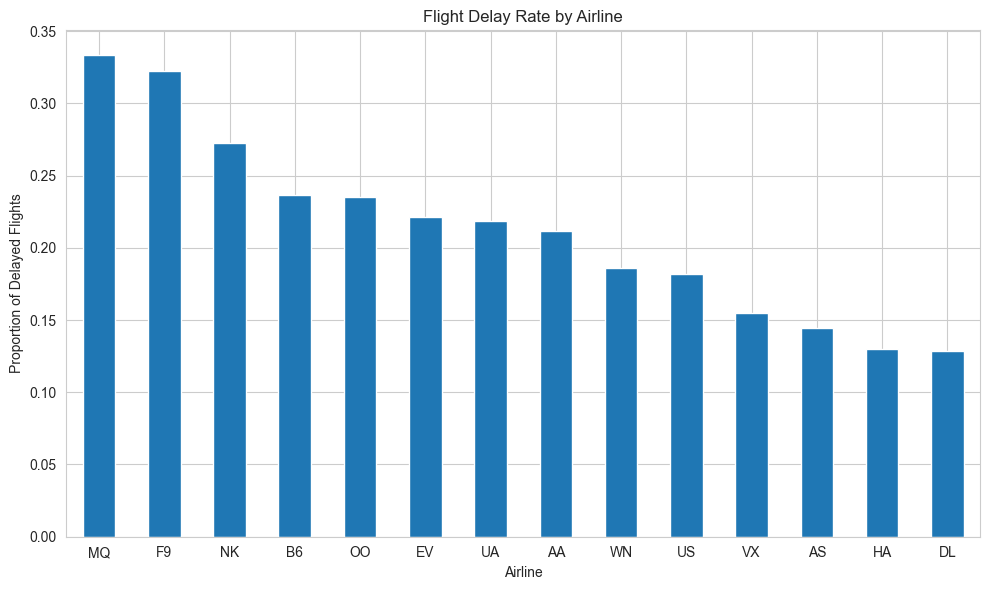

In [31]:
# Plot delay rate by airline
plt.figure(figsize=(10, 6))
delay_by_airline.plot(kind="bar")

plt.title("Flight Delay Rate by Airline")
plt.ylabel("Proportion of Delayed Flights")
plt.xlabel("Airline")

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Delay Rate by Airline

The analysis reveals significant variation in delay rates across airlines.
Some carriers exhibit delay rates above 30%, while others operate with considerably lower rates.
This variability indicates that airline-specific operational characteristics play an important role in flight delays, making the airline variable a relevant predictor for the supervised model.

In [32]:
# Calculate delay rate by day of the week
# Groups flights by weekday and computes the mean of the binary target
# The mean represents the proportion of delayed flights per day
delay_by_day = (
    flights_clean
    .groupby("DAY_OF_WEEK")["delayed"]
    .mean()
    .sort_index()
)

# Display delay rate by day of the week
delay_by_day

DAY_OF_WEEK
1    0.248062
2    0.182833
3    0.163851
4    0.175496
5    0.203697
6    0.195720
7    0.248173
Name: delayed, dtype: float64

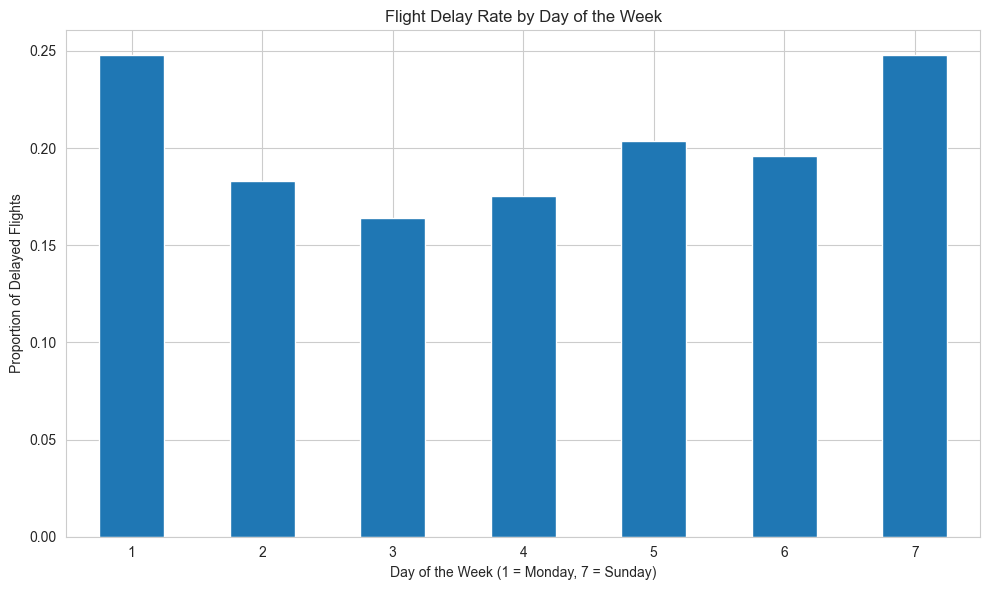

In [33]:
# Plot delay rate by day of the week
plt.figure(figsize=(10, 6))
delay_by_day.plot(kind="bar")

plt.title("Flight Delay Rate by Day of the Week")
plt.xlabel("Day of the Week (1 = Monday, 7 = Sunday)")
plt.ylabel("Proportion of Delayed Flights")

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Delay Rate by Day of the Week

The analysis shows a clear temporal pattern in flight delays across the week.

- Delays are more frequent on Mondays and Sundays, with approximately 25% of flights delayed on these days.
- In contrast, midweek flights (Tuesday to Thursday) present more stable operations, with delay rates between 16% and 18%.
- Fridays and Saturdays exhibit intermediate delay rates, possibly reflecting the beginning of peak operational periods combined with leisure travel.

Overall, this pattern suggests that the day of the week is a relevant temporal feature that may contribute to flight delay prediction.

In [34]:
# Extract scheduled departure hour from HHMM format (0–23)
sched_dep = flights_clean["SCHEDULED_DEPARTURE"].astype(int)
flights_clean["sched_dep_hour"] = (sched_dep // 100).astype(int)

# Display descriptive statistics of scheduled departure hours
flights_clean["sched_dep_hour"].describe()

count    483176.000000
mean         12.965011
std           4.662008
min           0.000000
25%           9.000000
50%          13.000000
75%          17.000000
max          23.000000
Name: sched_dep_hour, dtype: float64

In [36]:
# Create categorical feature for scheduled departure period
bins = [0, 6, 12, 18, 24]
labels = [
    "Early morning (00:00-05:59)",
    "Morning (06:00-11:59)",
    "Afternoon (12:00-17:59)",
    "Night (18:00-23:59)"
]

# Convert scheduled departure hour into categorical periods of the day
flights_clean["day_period"] = pd.cut(
    flights_clean["sched_dep_hour"],
    bins=bins,
    right=False,
    labels=labels
)

# Calculate delay rate by scheduled departure period
delay_by_period = (
    flights_clean
    .groupby("day_period", observed=True)["delayed"]
    .mean()
    .reindex(labels)
)

delay_by_period

day_period
Early morning (00:00-05:59)    0.116589
Morning (06:00-11:59)          0.158112
Afternoon (12:00-17:59)        0.226783
Night (18:00-23:59)            0.257748
Name: delayed, dtype: float64

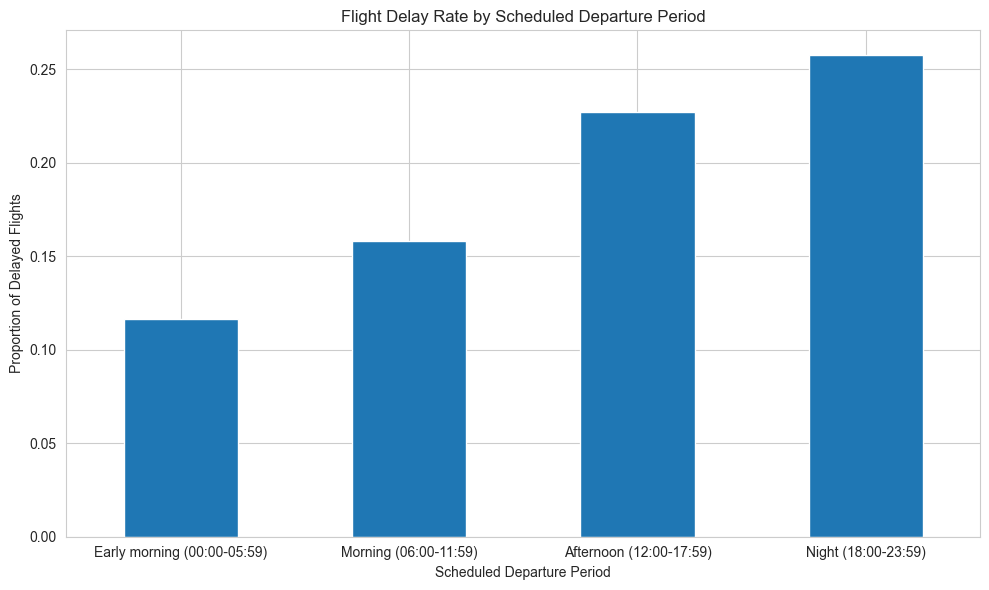

In [37]:
# Plot delay rate by scheduled departure period
plt.figure(figsize=(10, 6))
delay_by_period.plot(kind="bar")

plt.title("Flight Delay Rate by Scheduled Departure Period")
plt.xlabel("Scheduled Departure Period")
plt.ylabel("Proportion of Delayed Flights")

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Delay Rate by Scheduled Departure Period

The distribution of scheduled departure hours shows that flights are relatively evenly spread throughout the day, with a median departure time around early afternoon. This supports the use of time-of-day groupings to analyze systematic delay patterns.

The analysis reveals a clear temporal pattern in flight delays throughout the day. 
- Flights scheduled during the early morning period (00:00–05:59) present the lowest delay rates, indicating more punctual operations. 
- As the day progresses, delay rates increase steadily during the morning and afternoon, reaching their highest levels during evening flights (18:00–23:59).

This pattern suggests a cumulative operational effect, where delays tend to propagate and accumulate over the course of the day. Early morning flights are less affected by this phenomenon, possibly due to lower airport congestion and the absence of previous delays.

These results indicate that the scheduled departure time is an important temporal feature for predicting flight delays.

In [42]:
# Groups flights by both temporal variables and computes the mean delay rate
flights_clean.groupby(["DAY_OF_WEEK", "day_period"],observed=True)["delayed"].mean()

DAY_OF_WEEK  day_period                 
1            Early morning (00:00-05:59)    0.119030
             Morning (06:00-11:59)          0.189942
             Afternoon (12:00-17:59)        0.283440
             Night (18:00-23:59)            0.309135
2            Early morning (00:00-05:59)    0.129734
             Morning (06:00-11:59)          0.164031
             Afternoon (12:00-17:59)        0.194002
             Night (18:00-23:59)            0.205838
3            Early morning (00:00-05:59)    0.106468
             Morning (06:00-11:59)          0.141057
             Afternoon (12:00-17:59)        0.180055
             Night (18:00-23:59)            0.181950
4            Early morning (00:00-05:59)    0.085000
             Morning (06:00-11:59)          0.130604
             Afternoon (12:00-17:59)        0.196191
             Night (18:00-23:59)            0.227947
5            Early morning (00:00-05:59)    0.105613
             Morning (06:00-11:59)          0.150844
     

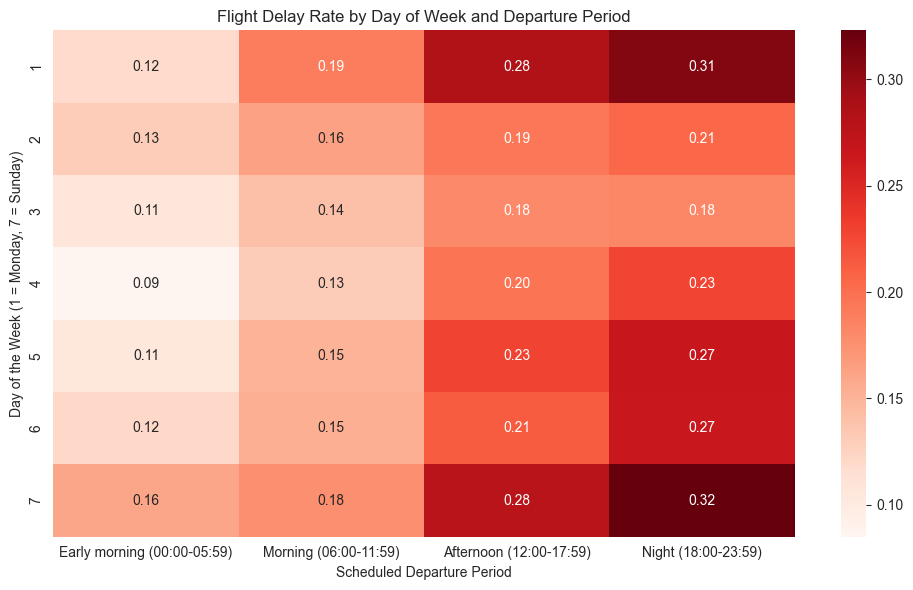

In [43]:
# Prepare data for heatmap visualization
delay_heatmap = (
    flights_clean
    .groupby(["DAY_OF_WEEK", "day_period"],observed=True)["delayed"]
    .mean()
    .unstack()
)

# Plot heatmap of delay rate by day of week + departure period
plt.figure(figsize=(10, 6))
sns.heatmap(
    delay_heatmap,
    annot=True,
    fmt=".2f",
    cmap="Reds"
)

plt.title("Flight Delay Rate by Day of Week and Departure Period")
plt.xlabel("Scheduled Departure Period")
plt.ylabel("Day of the Week (1 = Monday, 7 = Sunday)")

plt.tight_layout()
plt.show()

### Interaction Between Day of the Week and Departure Period

The interaction analysis reveals a consistent cumulative daily effect across all days of the week.

- For every weekday, delay rates are lowest during early morning flights, increase throughout the morning and afternoon, and reach their highest levels during evening departures.

- Mondays and Sundays present the most critical scenarios, particularly during the evening period, with delay rates exceeding 30%.

- In contrast, midweek nights (Tuesday to Thursday) exhibit lower delay rates, typically ranging between 18% and 23%.

These results suggest that flight delays are influenced by a combination of intra-day operational accumulation and weekly traffic patterns. The interaction between day of the week and scheduled departure period provides additional predictive power beyond considering each temporal variable independently.

### EDA Summary

The exploratory analysis indicates that flight delays are influenced by both airline-specific and temporal factors. Significant differences in delay rates were observed across airlines, suggesting that operational characteristics vary between carriers.

Temporal patterns also play a key role: delays are more frequent on Mondays and Sundays and tend to increase throughout the day, reaching their highest levels during evening departures.

The interaction between day of the week and scheduled departure period highlights a cumulative operational effect combined with weekly traffic dynamics.

These insights guided the feature selection and modeling strategy adopted in the supervised learning phase.